<a href="https://colab.research.google.com/github/reiple/ds2_data_mining_hw/blob/ckhsmile/DataMining_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터과학 HW

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import uniform, norm, binom, chi2
from scipy.stats import t
from sklearn.model_selection import train_test_split
from collections import Counter

### 3.임의 표본 추정

각각의 분포에서 표본을 1000개 생성하고, 이 데이터를 이용하여 왜도(skewness), 첨도(kurtosis)를 추정하시오.

표본 평균 $\bar{x} = {1\over{n}}\sum_{i=1}^n x_i$

표본 분산 $s^2 = {1\over{n-1}}\sum_{i=1}^n (x_i - \bar{x})^2$

표본 왜도 = ${1\over{n-1}}\sum_{i=1}^n({{x_i-\bar{x}}\over{s}})^3$

표본 첨도 = ${1\over{n-1}}\sum_{i=1}^n({{x_i-\bar{x}}\over{s}})^4$

---


(a) 왜도(Skewness): 분포가 한쪽으로 치우친 정도를 측정하는 통계량

i. **N(0,2)** 과 𝒳(**5**) 표본을 생성한 후, 분포를 그리시오.

ii. 각 분포에서 왜도를 구하시오.

N(0,2)의 왜도: 0.13918109736590192
chi(5)의 왜도: 1.5421784357245172


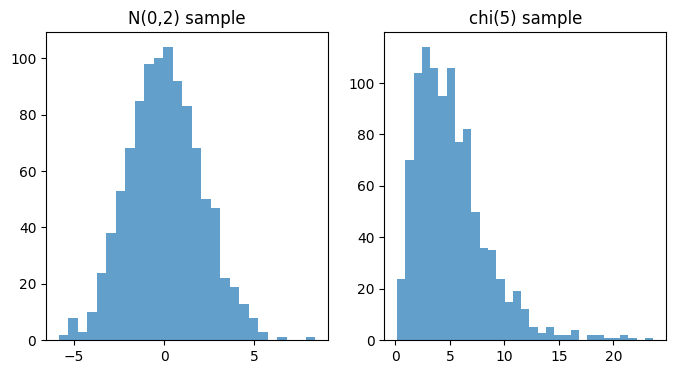

In [ ]:
from scipy.stats import skew


normal_sample = norm.rvs(loc = 0, scale= 2, size=1000) #rvs : 랜덤 표본 생성하는 매서드, loc : 평균, scale : 표준편차
chi_sample = chi2.rvs(5, size=1000)  # 자유도

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.hist(x=normal_sample, bins='auto', alpha=0.7) # alpha : 투명도로 0에 가까울수록 요소가 투명해지고 1에 가까울수록 불투명해짐.
ax1.set_title('N(0,2) sample')
# ax1.set_ylim([0,120])

ax2.hist(x=chi_sample, bins='auto', alpha=0.7)
ax2.set_title('chi(5) sample')
# ax2.set_ylim([0,120])
fig.show()

print(f'N(0,2)의 왜도: {skew(normal_sample)}')
print(f'chi(5)의 왜도: {skew(chi_sample)}')

(b) 첨도(Kurtosis): 이상치가 얼마나 존재하는지를 측정하는 통계량

i. 자유도가 1인 t분포, 자유도가 10인 t분포와 표준정규분포(N(0,1))에서 표본을 생성한 후, 분포를 그리시오.

ii. 각 분포에서 첨도를 구하시오.

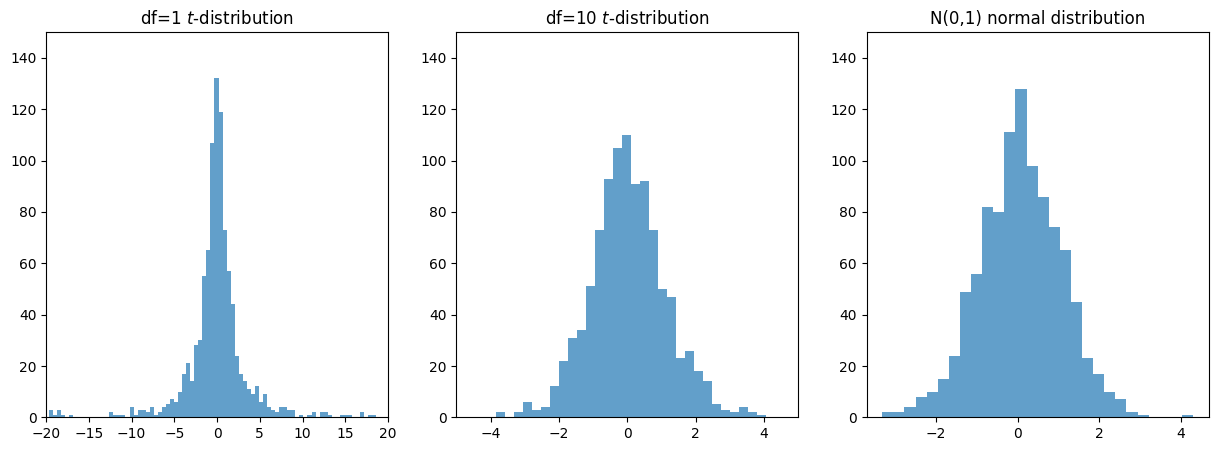

In [ ]:
from scipy.stats import kurtosis

t_sample_1 = t.rvs(df=1, size=1000)
t_sample_10 = t.rvs(df=10, size=1000)
snormal_sample = norm.rvs(loc=0, scale=1, size=1000) # 정규분포

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_xlim(-20, 20)
ax1.set_ylim(0, 150)
ax1.hist(t_sample_1, bins='auto', alpha=0.7)
ax1.set_title(r'df=1 $t$-distribution')

ax2.set_xlim(-5, 5)
ax2.set_ylim(0, 150)
ax2.hist(t_sample_10, bins='auto', alpha=0.7)
ax2.set_title(r'df=10 $t$-distribution')

ax3.set_ylim(0, 150)
ax3.hist(snormal_sample, bins='auto', alpha=0.7)
ax3.set_title(r'N(0,1) normal distribution')

fig.show()

In [ ]:
print(r'df=1 t-distribution kurtosis:', kurtosis(t_sample_1))
print(r'df=10 t-distribution kurtosis:', kurtosis(t_sample_10))
print(r'N(0,1) normal distribution kurtosis:', kurtosis(snormal_sample))

# 첨도 ; 확률 분포의 꼬리 부분의 뾰족함 또는 평평함을 나타내는 통계적인 개념.
# 정규 분포보다 t 분포가, t 분포의 자유도가 낮을수록 첨도가 큼 (꼬리가 길음)
# t 분포는 모집단의 표준편차를 모를때 표본의 표준편차를 사용, 자유도(샘플링수 -1)가 클수록 정규 분포에 가까워짐

df=1 t-distribution kurtosis: 212.7800157428017
df=10 t-distribution kurtosis: 0.572962714420036
N(0,1) normal distribution kurtosis: -0.264998272301324


### 4.랜덤워크

$X_i \overset{i.i.d}{\sim} U(-1, 1)$ 일 때, $S_n = X_1 + \cdots + X_n$ 인 랜덤워크에 대해서 고려하자.

독립적으로 생성된 두 개의 랜덤워크 $\{S_n : n = 1, \cdots , 10000\}$ 과 $\{S_n' : n = 1, \cdots , 10000\}$ 의 상관계수를 구하시오.

In [ ]:
uniform_sample1 = uniform.rvs(loc = -1, scale = 2, size = 10000) # loc : uniform  분포의 최소값, scale : 범위로 -1+2 = 1 -> U(-1,1)이 됨.
uniform_sample2 = uniform.rvs(loc = -1, scale = 2, size = 10000)
# np.corrcoef(uniform_sample1, uniform_sample2)를 사용하면 상관 관계가 아닌 두 변수 간의 상관계수를 계산하게 됨.

random_walk1 = np.array([])
random_walk2 = np.array([])

for i in range(10000):
  random_walk1 = np.append(random_walk1, uniform_sample1[0:i+1].sum())
  random_walk2 = np.append(random_walk2, uniform_sample2[0:i+1].sum())
  # 랜덤 워크 변수의 누적 합을 계산함으로써 시간에 따른 경로를 모델링하고, 이를 통해 상관관계를 계산할 수 있음.

np.corrcoef(random_walk1, random_walk2)
# 상관계수가 0.8938로 독립적인 두개의 랜덤 워크도 상관관계가 높음.

array([[1.       , 0.8938637],
       [0.8938637, 1.       ]])

### 5.모비율 검정

로또는 45개의 숫자 중에서 6개의 당첨 번호를 추첨한다. 10번의 모의실험을 통해 당첨번호를 추출 한 후, 각 번호가 나올 확률이 동일한지를 검정하려고 한다. 다음의 절차를 따르시오.

(이 때 i번째 공이 당첨번호에 포함될 확률을 $p_i$라고 하자.)

---


(a) 각 번호가 나올 확률이 동일하다고 가정하고 로또 당첨 번호를 10회 추출하시오.

In [17]:
winning_tickets= [np.random.choice(range(1, 46), size=6, replace=False) for i in range(10)]
winning_tickets

[array([20, 17, 42,  7, 43,  8]),
 array([30, 24, 41, 28, 39,  6]),
 array([19, 18, 26,  7, 35,  1]),
 array([35, 26,  3,  7,  6, 40]),
 array([10,  2, 45, 43,  6, 20]),
 array([16,  3, 34, 27, 43, 10]),
 array([ 2,  9,  7, 40, 21, 23]),
 array([ 3, 13, 37, 32, 35,  2]),
 array([28, 16, 29, 42, 17, 24]),
 array([45, 31, 12,  3, 13, 21])]

(b) 10개의 표본을 통해 각 i번째 공이 당첨 번호에 포함 될 확률 $\hat{p}_i$ 를 추정하시오.

In [21]:
winning_tickets = np.array(winning_tickets).reshape(-1)
count_numbers = np.bincount(winning_tickets)[1:] # np.bincount() : 0부터 시작하는 정수 배열에 대해 각 숫자의 발생 빈도를 계산

# 나오지 않는 숫자가 있을수 있으므로 크기가 45가 되도록 0으로 패딩
if len(count_numbers) < 45:
    count_numbers = np.pad(count_numbers, (0, 45 - len(count_numbers)), mode='constant')

# print(count_numbers)

# 각 i번째 공의 당첨 확률을 계산하여 출력
prob_arr=np.array([])

for i in range(len(count_numbers)):
    prob_arr = np.append(prob_arr, count_numbers[i] / len(winning_tickets))

print(prob_arr)

# for i, prob in enumerate(prob_arr, start=1):
#     print(f"{i}번 공 확률: {prob:.8f}")

# enumerate(iterable, start=1) : 반복 가능한(iterable) 객체(리스트, 튜플, 문자열 등)를 받아 인덱스와 해당 요소를 함께 반환하는 iterator를 생성
#                              : start는 인덱스의 시작값을 의미하며 기본값은 0, 1로 할 경우 실제 데이터는 0부터 있지만 1부터 시작하는것처럼 할수 있음.


[0.01666667 0.05       0.06666667 0.         0.         0.05
 0.06666667 0.01666667 0.01666667 0.03333333 0.         0.01666667
 0.03333333 0.         0.         0.03333333 0.03333333 0.01666667
 0.01666667 0.03333333 0.03333333 0.         0.01666667 0.03333333
 0.         0.03333333 0.01666667 0.03333333 0.01666667 0.01666667
 0.01666667 0.01666667 0.         0.01666667 0.05       0.
 0.01666667 0.         0.01666667 0.03333333 0.01666667 0.03333333
 0.05       0.         0.03333333]


(c) 각 i에 대해 다음의 검정을 시행하시오. p-value가 0.05보다 작은 경우는 몇 개 있는가?

> $H_0 : p_i = 6/45$ vs $H_1 : p_i > 6/45$

In [22]:
from statsmodels.stats.proportion import proportions_ztest

pval_arr = np.array([])

for i in range(len(count_numbers)):
    z_stats, p_val = proportions_ztest(count_numbers[i], nobs=10, value=6/45, alternative= "larger")
    # print(f"{i+1}번째 공 z-stats : {z_stats:.4f}, p-value : {p_val:.4f} ")
    pval_arr = np.append(pval_arr, p_val)

print('p-value가 0.05보다 작은 경우는 ', (pval_arr < 0.05).sum(), '개 입니다.')


p-value가 0.05보다 작은 경우는  2 개 입니다.


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std


(d) 본페르니 교정을 이용하여, 다중 검정을 시행하시오. p-value가 0.05/45보다 작은 경우는 몇 개 있는가?

> $H_0 : p_i = 6/45, ∀i$ vs $H_1$ : 어떤 i에 대해서 $p_i > 6/45$ 을 만족한다.

In [ ]:
print('p-value가 0.05/45 보다 작은 경우는 ', (pval_arr < 0.05/45).sum(), '개 입니다.')


# 본페르니 교정(Bonferroni correction)은 다중 비교를 할 때 제1종 오류의 확률을 제어하기 위한 방법 중 하나
# * 제1종 오류 : 실제로는 차이나 효과가 없는데 데이터의 샘플링 변동 등의 이유로인해 차이나 효과가 있다고 잘못 결론 내리는 오류
# * 다중 비교 문제는 여러 개의 독립적인 가설 검정을 동시에 수행할 때 각각의 검정에서 제1종 오류의 위험이 누적되므로
#   이를 제어하지 않으면 전체적인 제1종 오류의 확률이 크게 증가함.
# * 본페르니 교정은 이러한 문제를 해결하기 위한 방법 중 하나로, 원래의 유의수준을 전체 검정 횟수로 나눈 값을 새로운 유의수준으로 사용하는 방법임.

# 본페르니 교정은 매우 보수적인 방법으로, 이 방법을 사용할 경우
# 제1종 오류의 위험은 크게 줄어들지만, 제2종 오류의 위험(실제로 차이나 효과가 있지만 그렇지 않다고 결론 내리는 오류)은 증가할 수 있음


p-value가 0.05/45보다 작은 경우는 0개 입니다.


### 6.p-value 계산
스웨인 대 알리바마 재판에서 귀무 가설은 '공정한 배심원 선택' 이고 대립가설은 '불공정한 배심원 선택'이다.  
전체 인구 중 26%가 흑인이다. 우리는 100명을 뽑았을 때, 8명의 흑인이 선택되었다는 데이터를 관찰하였다.  
이 경우 p-value를 구하여라.

(hint: 이항분포의 누적분포함수 또는 확률질량함수를 이용하시오.)

$H_0 : \mu = \mu_0$ vs $H_1 : \mu > \mu_0$

검정통계량 $Z = \dfrac{\bar{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}}\sim N(0,1)\; (H_0 \text{가 참일 때})$


z : 실제 관측된 검정통계량 값

P-value = $P(Z > z | H_0)$

p-value : 귀무가설 $H_0$ 하에서 관찰된 검정통계량 값이 귀무가설 $H_0$에 더 반대되는 결과를 관측할 확률을 유의확률이라고 하며, 이는 관측 결과에 의해 귀무가설 $H_0$를 기각할 수 있는 최소의 유의수준이다.

In [24]:
# 이항 분포의 누적 분포 함수 활용

print('p-value:', binom.cdf(n = 100, p=0.26, k=8))
# 100번의 시행에서 성공 확률이 26%인 이항 분포에서 8번 이하의 성공이 나올 확률
# k: 성공의 횟수, n: 시행 횟수, p: 성공 확률


# 이항 분포의 확률 질량 함수를 활용
p_val = 0
for i in range(9): # 0에서 8번까지이므로.. range(9)로 해야 함.
  p_val += binom.pmf(n=100, p=0.26, k=i)

print(f'p-value: {p_val}')

p-value: 4.73479499788932e-06
p-value: 4.734794997889316e-06


### 8.Bootstrap sampling
 다음의 데이터를 주어졌다고 하자. 이때, 설명변수를 $(x_1, x_2)$, 반응변수를 $y$로 하는 선형회귀모형을 가정하고 $(x_1, x_2) = (0.1, 0.2)$일 때, Bootstrap resampling을 통한 예측구간 (prediction interval)을 추정하고자 한다.
다음의 식을 만족하는 $[L, U]$을 $x_{\text{new}}$ 일 때, 신뢰도가 $(1 - \alpha)\%$인 예측 구간이라고 한다.  
$P(L\leq x_{new}^{T}\hat{\beta }+\varepsilon \leq U) = 1-\alpha $

\#  1   2 3 4 5 6 7 8 9 10  
$y$   5. 7.9 11.2 11.7 8.9 6.8 8.4 8.8 10.1 7.5  
$x_1$ 1. 1.1 1.5 3. 2.4 1.2 2.4 2.9 1.3 2.  
$x_2$ 0.5 2.1 3. 1.5 1.7 1.2 0.2 0.9 2.3 1.  


**(a)**
Bootstrap resampling을 이용하여 bootstrap sample을 얻고 이를 이용하여 선형회귀모형의 계수를 추정하시오.

In [32]:
import pandas as pd

# 데이터 생성
data = {
    'y': [5.0, 7.9, 11.2, 11.7, 8.9, 6.8, 8.4, 8.8, 10.1, 7.5],
    'x1': [1.0, 1.1, 1.5, 3.0, 2.4, 1.2, 2.4, 2.9, 1.3, 2.0],
    'x2': [0.5, 2.1, 3.0, 1.5, 1.7, 1.2, 0.2, 0.9, 2.3, 1.0]
}

df = pd.DataFrame(data)

df.head()

,y,x1,x2
0,5.0,1.0,0.5
1,7.9,1.1,2.1
2,11.2,1.5,3.0
3,11.7,3.0,1.5
4,8.9,2.4,1.7


In [44]:
import statsmodels.api as sm

rand_idx =np.random.choice(len(df), 100, replace= True)  #  0부터 'len(df) -1'까지의 숫자 중 무작위로 100개의 숫자를 선택, 중복 허용
# print(rand_idx)

bootstrap_sample = df.iloc[rand_idx] # iloc : index를 사용하여 특정 행들을 선택

# print('bootstrap sample수 :', len(bootstrap_sample))
# bootstrap_sample.head(10)

x = sm.add_constant(bootstrap_sample[['x1', 'x2']])
y = bootstrap_sample['y']

olsfit = sm.OLS(y, x).fit()
olsfit.params



const    2.140869
x1       1.880693
x2       1.963995
dtype: float64



> x = sm.add_constant(bootstrap_sample(['x1', 'x2']))  

주어진 배열에 상수 열을 추가하여 다음과 같은 식으로 확장함.   
$y = \beta_0 \cdot 1 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \epsilon$

이렇게 상수항을 추가함으로써, 모델은 절편 $ \beta_0$을 추정할 수 있게 됨.  
만약 sm.add_constant() 함수를 사용하지 않고 모델을 적합하면, 절편이 제외된 모델이 된다.







**(b)**
(a)에서 추정한 모형을 이용하여 $(x1, x2) = (0.1, 0.2)$일 때의 예측값을 구하시오.

In [58]:
predict_value = olsfit.predict((1, 0.1,0.2))
print("예측값:", predict_value) # predict(const, x1, x2) 상수항을 넣어줘야함.

예측값: [2.72173758]


**(c)**
(a)에서 추정한 모형과 bootstrap sample들을 이용하여 잔차들을 구하고, 그 잔차들 중 하나의 값을 랜덤 추출 하시오.



In [59]:
random_residual = np.random.choice(olsfit.resid)
print('랜덤으로 추출된 잔차: ', random_residual)

랜덤으로 추출된 잔차:  -0.5624756160722093


**(d)**
(b)에서 추정한 예측값과 (c) 생성된 노이즈를 더한 값을 저장하시오.



In [62]:
data = predict_value + random_residual
print(data)

[2.15926197]


**(e)**
(a)-(d) 과정을 2,000번 반복하시오.



In [65]:
predict_values = np.array([])

for i in range(2000):
  rand_idx =np.random.choice(len(df), 100, replace= True)
  bootstrap_sample = df.iloc[rand_idx] # iloc : index를 사용하여 특정 행들을 선택

  x = sm.add_constant(bootstrap_sample[['x1', 'x2']])
  y = bootstrap_sample['y']

  olsfit = sm.OLS(y, x).fit()
  predict_val = olsfit.predict((1, 0.1,0.2))
  random_res = np.random.choice(olsfit.resid)

  predict_values = np.append(predict_values, predict_val + random_res )


print(len(predict_values))
predict_values


2000


array([2.47380364, 4.01351404, 2.21881162, ..., 3.81252433, 2.61394267,
       2.64457594])

**(f)**
(e) 에서 저장된 2000개의 값들을 이용하여 $(x1, x2) = (0.1, 0.2)$일 때의 95% 예측구간을 구하시오.

In [67]:
z_value = norm.ppf(0.975)  # 95% 신뢰수준을 갖는 정규분포의 Z 값을 계산

mean_predict = np.mean(predict_values)
stdev = np.std(predict_values)

predict_interval = (mean_predict - z_value * stdev , mean_predict + z_value * stdev)

print("95% 예측 구간:", predict_interval)

95% 예측 구간: (1.4146415800009051, 4.3803981800745255)


### 9.QQ-Plot
문제 8의 Table 1 데이터를 이용하자. 선형 모형의 잔차 ($\hat{\varepsilon }_{i} = y_i - \hat{y}_i$)들을 이용하여 QQ-plot을 그리고 해석하시오.


In [ ]:
import scipy.stats as stats
import pylab
normal_sample=norm.rvs(loc = 1, scale= 5, size=500) # 정규분포
stats.probplot(normal_sample, dist="norm", plot=pylab)
pylab.show()

### 10. 차원의 저주
차원의 저주에 대한 모의 실험을 위해 아래의 절차를 따르시오.

(a) \( d=1 \) 일때, $X \sim  U(-3,3)$를 따르는 데이터를 50개 생성하시오.




(b) $( X_i > 0 )$ 이면 $( Y_i = 1 )$, 그렇지 않으면 $( Y_i = 0 )$인 데이터를 생성하시오.



(c) 학습데이터와 테스트데이터의 비율이 0.5가 되도록 나누시오.



(d) 학습데이터로 K-NN(K=3) 모형을 학습하고, 테스트 데이터를 이용하여 정확도를 계산하시오.



(e) (a) ∼ (d)의 과정을 $( d = 2, \ldots, 40 )$ 까지 반복하고, 정확도를 저장하시오.  
> (d ≥ 2 일 때는, 생성된 $( X_i \sim U(-3, 3)^d )$ 데이터들의 1번째 성분이 0보다 크면 1, 아니면 0으로 레이블링 하시오.)




(f) X축을  d(차원의 수), Y축을 정확도로 하는 그래프를 그리시오.